# DS-7331 Machine Learning Mini Project
## Airbnb Price Data - Logistic and SVM
### Allen Miller, Ana Glaser, Jake Harrison, Lola Awodipe

https://nbviewer.jupyter.org/github/allenmiller17/SMU_7331_ML1_Project_1/blob/main/Project_1_Final_Write_Up.ipynb

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from sklearn.model_selection import train_test_split

import numpy as np
from scipy import stats

from sklearn import metrics

In [2]:
#importing the data
pdata = pd.read_csv("airbnb.csv")

### Business Understanding

In [3]:
#unlogging the logged price data field for easier interpretation
pdata['price'] = np.exp(pdata.log_price)
pdata = pdata.dropna()

In [4]:
#value_list = ["Apartment","House","Condominium","Loft","Townhouse"]
value_list = ["Apartment","House"]
boolean_series = ~pdata.property_type.isin(value_list)
filtered_df = pdata[boolean_series]

filtered_df.head(100)

for i in list (filtered_df.index):
    pdata.loc[i,'property_type'] = "other"


In [5]:
pdata.head()

,id,log_price,property_type,room_type,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,...,last_review,latitude,longitude,neighbourhood,number_of_reviews,review_scores_rating,zipcode,bedrooms,beds,price
1,6304928,5.129899,Apartment,Entire home/apt,7,1.0,Real Bed,strict,True,NYC,...,9/23/2017,40.766115,-73.989040,Hell's Kitchen,6,93.0,10019,3.0,3.0,169.0
2,7919400,4.976734,Apartment,Entire home/apt,5,1.0,Real Bed,moderate,True,NYC,...,9/14/2017,40.808110,-73.943756,Harlem,10,92.0,10027,1.0,3.0,145.0
4,3808709,4.744932,Apartment,Entire home/apt,2,1.0,Real Bed,moderate,True,DC,...,1/22/2017,38.925627,-77.034596,Columbia Heights,4,40.0,20009,0.0,1.0,115.0
5,12422935,4.442651,Apartment,Private room,2,1.0,Real Bed,strict,True,SF,...,9/5/2017,37.753164,-122.429526,Noe Valley,3,100.0,94131,1.0,1.0,85.0
7,13971273,4.787492,other,Entire home/apt,2,1.0,Real Bed,moderate,True,LA,...,4/12/2017,34.046737,-118.260439,Downtown,9,93.0,90015,1.0,1.0,120.0


In [ ]:
replaceStruct = {
                "cleaning_fee":     {"True": 1, "False": 0} 
                    }


pdata=pdata.replace(replaceStruct)
pdata.head()

In [6]:


#oneHotCols=["room_type","bed_type","property_type","neighbourhood","city","cancellation_policy","cleaning_fee"]
oneHotCols=["room_type","bed_type","neighbourhood","city","cancellation_policy","cleaning_fee"]
pdata.drop(['description','host_response_rate','first_review','host_since','last_review','host_has_profile_pic','host_identity_verified','instant_bookable','zipcode','id'], axis=1, inplace=True)
pdata=pd.get_dummies(pdata, columns=oneHotCols)
pdata.head(10)

,log_price,property_type,accommodates,bathrooms,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds,...,city_LA,city_NYC,city_SF,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60,cleaning_fee_False,cleaning_fee_True
1,5.129899,Apartment,7,1.0,40.766115,-73.989040,6,93.0,3.0,3.0,...,0,1,0,0,0,1,0,0,0,1
2,4.976734,Apartment,5,1.0,40.808110,-73.943756,10,92.0,1.0,3.0,...,0,1,0,0,1,0,0,0,0,1
4,4.744932,Apartment,2,1.0,38.925627,-77.034596,4,40.0,0.0,1.0,...,0,0,0,0,1,0,0,0,0,1
5,4.442651,Apartment,2,1.0,37.753164,-122.429526,3,100.0,1.0,1.0,...,0,0,1,0,0,1,0,0,0,1
7,4.787492,other,2,1.0,34.046737,-118.260439,9,93.0,1.0,1.0,...,1,0,0,0,1,0,0,0,0,1
8,4.787492,House,2,1.0,37.781128,-122.501095,159,99.0,1.0,1.0,...,0,0,1,0,1,0,0,0,0,1
10,4.605170,Apartment,2,1.0,40.723883,-73.983880,82,93.0,1.0,1.0,...,0,1,0,0,0,1,0,0,0,1
11,5.010635,House,4,1.5,33.875862,-118.403293,29,97.0,2.0,2.0,...,1,0,0,0,0,1,0,0,0,1
13,5.298317,Apartment,6,1.5,38.919630,-77.031189,13,89.0,2.0,3.0,...,0,0,0,0,0,1,0,0,0,1
17,4.595120,other,2,2.0,42.339194,-71.049672,12,88.0,1.0,1.0,...,0,0,0,0,0,1,0,0,0,1


In [7]:

X = pdata.drop('property_type',axis=1)     
Y = pdata['property_type']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

x_train.head()

,log_price,accommodates,bathrooms,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds,price,...,city_LA,city_NYC,city_SF,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60,cleaning_fee_False,cleaning_fee_True
49285,5.075174,3,1.0,34.107084,-118.287115,2,100.0,1.0,2.0,160.0,...,1,0,0,1,0,0,0,0,0,1
21385,4.605170,2,1.0,33.772359,-118.197040,21,96.0,0.0,1.0,100.0,...,1,0,0,0,0,1,0,0,0,1
42475,4.248495,3,1.0,33.997107,-118.468512,274,98.0,1.0,1.0,70.0,...,1,0,0,0,0,1,0,0,0,1
31707,4.605170,4,1.0,40.723631,-73.802849,80,95.0,1.0,2.0,100.0,...,0,1,0,0,0,1,0,0,0,1
38054,5.010635,2,1.0,34.099651,-118.366981,28,99.0,1.0,1.0,150.0,...,1,0,0,0,1,0,0,0,0,1


In [8]:
print("{0:0.2f}% data is in training set".format((len(x_train)/len(pdata.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(x_test)/len(pdata.index)) * 100))

70.00% data is in training set
30.00% data is in test set


In [9]:

# Fit the model on train
modelFIRST = LogisticRegression(solver="liblinear")
modelFIRST.fit(x_train, y_train)
#predict on test
y_predict = modelFIRST.predict(x_test)


coef_df = pd.DataFrame(modelFIRST.coef_)
coef_df['intercept'] = modelFIRST.intercept_
print(coef_df)

          0         1         2         3         4         5         6  \
0 -0.222864 -0.011707 -0.543930  0.130631  0.013555 -0.001972 -0.011724   
1  0.143308  0.012231  0.334318 -0.134612 -0.011537  0.003558  0.004558   
2  0.402629  0.006101  0.246353 -0.116557  0.000766 -0.001045  0.013364   

          7         8         9  ...       612       613       614       615  \
0 -0.151074 -0.071907 -0.001805  ...  0.502700  0.128351  0.060407  0.034039   
1  0.598619 -0.012483  0.000921  ... -0.337713 -0.186033 -0.022496  0.000861   
2 -0.393464  0.099318 -0.000081  ... -0.593718  0.205242 -0.072048 -0.046211   

        616       617       618       619       620  intercept  
0  0.087186  0.384920 -0.681039 -0.040388 -0.074098  -0.114486  
1 -0.034358  0.340277 -0.109608  0.030688  0.143988   0.174676  
2 -0.077445 -0.996699  1.164531  0.009229 -0.037102  -0.027873  

[3 rows x 622 columns]


In [10]:
model_score = modelFIRST.score(x_test, y_test)
print(model_score)

0.732486558092418


Trainig accuracy 0.7427025582793401

Testing accuracy 0.732486558092418

Confusion Matrix


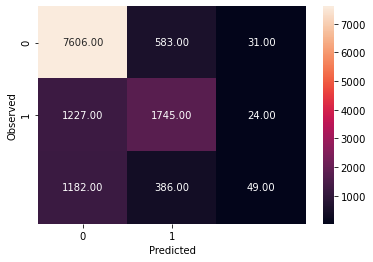

None


In [13]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score
from sklearn.linear_model import LogisticRegression

## function to get confusion matrix in a proper format
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

print("Trainig accuracy",modelFIRST.score(x_train,y_train))  
print()
print("Testing accuracy",modelFIRST.score(x_test, y_test))
print()
print('Confusion Matrix')
print(draw_cm(y_test,y_predict))


In [ ]:
pdata.nunique()

In [14]:
#AUC ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, modelFIRST.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, modelFIRST.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

ValueError: could not convert string to float: 'Apartment'

In [15]:
modelFIRST.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [16]:
#Starting with L2
train_score=[]
test_score=[]
solver = ['newton-cg','lbfgs','liblinear','sag','saga']
for i in solver:
    model = LogisticRegression(random_state=42,penalty='l2', C = 0.75,solver=i)  # changing values of solver
    model.fit(x_train, y_train) 
    y_predict = model.predict(x_test)     
    train_score.append(round(model.score(x_train, y_train),3))
    test_score.append(round(model.score(x_test, y_test),3))
    
print(solver)
print()
print(train_score)
print()
print(test_score)

KeyboardInterrupt: 

In [17]:
pdata.nunique()

log_price                                643
property_type                              3
accommodates                              16
bathrooms                                 17
latitude                               42758
                                       ...  
cancellation_policy_strict                 2
cancellation_policy_super_strict_30        2
cancellation_policy_super_strict_60        2
cleaning_fee_False                         2
cleaning_fee_True                          2
Length: 622, dtype: int64